<a href="https://colab.research.google.com/github/robajo12/data_analytics_2/blob/main/Python/Advanced_Python/COVID19_Testing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Testing Project

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Environment Set up

Importation of all required libraries needed for data analysis. 

In [1]:
rt pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Data Acquisition

Collection of the dataset for data analysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/COVID-19_Daily_Testing.csv')

In [3]:
df.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [4]:
df.shape

(89, 59)

In [5]:
df.columns

Index(['Date', 'Day', 'Tests', 'Cases', 'People Not-Positive - Total',
       'People Tested - Age 0-17', 'People Tested - Age 18-29',
       'People Tested - Age 30-39', 'People Tested - Age 40-49',
       'People Tested - Age 50-59', 'People Tested - Age 60-69',
       'People Tested - Age 70-79', 'People Tested - Age 80+',
       'People Tested - Age Unknown', 'People Tested - Female',
       'People Tested - Male', 'People Tested - Gender Unknown',
       'People Tested - Latinx', 'People Tested - Asian Non-Latinx',
       'People Tested - Black Non-Latinx', 'People Tested - White Non-Latinx',
       'People Tested - Other Race Non-Latinx',
       'People Tested - Unknown Race/Ethnicity', 'People Positive - Age 0-17',
       'People Positive - Age 18-29', 'People Positive - Age 30-30',
       'People Positive - Age 40-49', 'People Positive - Age 50-59',
       'People Positive - Age 60-69', 'People Positive - Age 70-79',
       'People Positive - Age 80+', 'People Positive - Age Un

# Data Wrangling and EDA 


In [6]:
# check if there is any missing values
df.isnull().sum()

Date                                            1
Day                                             1
Tests                                           0
Cases                                           0
People Not-Positive - Total                     0
People Tested - Age 0-17                        0
People Tested - Age 18-29                       0
People Tested - Age 30-39                       0
People Tested - Age 40-49                       0
People Tested - Age 50-59                       0
People Tested - Age 60-69                       0
People Tested - Age 70-79                       0
People Tested - Age 80+                         0
People Tested - Age Unknown                     0
People Tested - Female                          0
People Tested - Male                            0
People Tested - Gender Unknown                  0
People Tested - Latinx                          0
People Tested - Asian Non-Latinx                0
People Tested - Black Non-Latinx                0


In [7]:
# Dropping columns day and Date.
df=df.drop(columns=['Date','Day'])

In [8]:
df.head()

,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [25]:
#sub-dataset from the original data
df1 = df [['People Tested - Female','People Tested - Male', 'People Tested - Gender Unknown','Cases','People Positive - Latinx','People Positive - Asian Non-Latinx','People Positive - Black Non-Latinx','People Positive - White Non-Latinx','People Positive - Other Race Non-Latinx','People Positive - Unknown Race/Ethnicity']]
df1.head()

,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,Cases,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity
0,0,1,0,0,0,0,0,0,0,0
1,"1,238","1,158",35,705,343,9,103,51,22,177
2,"2,049","1,786",263,772,319,12,151,68,35,187
3,8,9,0,1,0,0,1,0,0,0
4,8,10,0,3,0,0,0,3,0,0


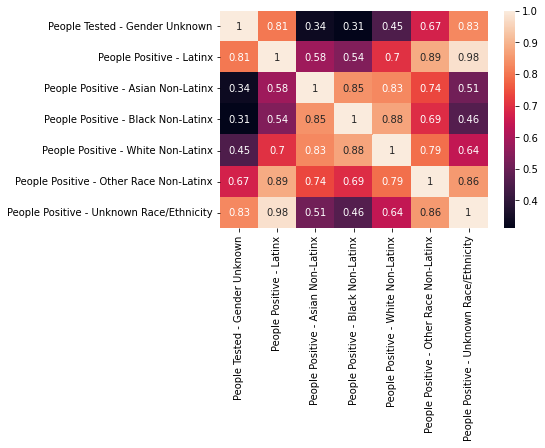

In [26]:
# creation of the correlation matrix to observe correlation between variables.
import seaborn as sns
sns.heatmap(df1.corr(), annot = True)

In [38]:
X = df[['People Tested - Female','People Tested - Male', 'People Tested - Gender Unknown','Cases']]
X.head()

,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,Cases
0,0,1,0,0
1,"1,238","1,158",35,705
2,"2,049","1,786",263,772
3,8,9,0,1
4,8,10,0,3


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   People Tested - Female          89 non-null     object
 1   People Tested - Male            89 non-null     object
 2   People Tested - Gender Unknown  89 non-null     object
 3   Cases                           89 non-null     object
dtypes: object(4)
memory usage: 2.9+ KB


In [53]:
# removing commas from numerics value
X = X.replace(',','', regex=True)
X.head()


,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,Cases
0,0,1,0,0
1,1238,1158,35,705
2,2049,1786,263,772
3,8,9,0,1
4,8,10,0,3


In [57]:
y= df[['People Positive - Latinx','People Positive - Asian Non-Latinx','People Positive - Black Non-Latinx','People Positive - White Non-Latinx','People Positive - Other Race Non-Latinx','People Positive - Unknown Race/Ethnicity']]
y.head()

,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity
0,0,0,0,0,0,0
1,343,9,103,51,22,177
2,319,12,151,68,35,187
3,0,0,1,0,0,0
4,0,0,0,3,0,0


In [58]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   People Positive - Latinx                  89 non-null     int64
 1   People Positive - Asian Non-Latinx        89 non-null     int64
 2   People Positive - Black Non-Latinx        89 non-null     int64
 3   People Positive - White Non-Latinx        89 non-null     int64
 4   People Positive - Other Race Non-Latinx   89 non-null     int64
 5   People Positive - Unknown Race/Ethnicity  89 non-null     int64
dtypes: int64(6)
memory usage: 4.3 KB


In [59]:
X.shape

(89, 4)

In [60]:
y.shape

(89, 6)

# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66, 4)
(23, 4)
(66, 6)
(23, 6)


In [64]:
# checking if there is a relationship between X and y.
linReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print(linReg.intercept_)

[-42.25901071   4.0343235   44.0778022   18.58855769  -1.48396137
 -22.95771131]


In [68]:
print(linReg.coef_)

[[-0.06852325  0.11917443  0.15786688  0.36334698]
 [ 0.00401063 -0.00925857 -0.02635844  0.02688123]
 [ 0.09799897 -0.14678096 -0.24570091  0.24580267]
 [ 0.04217329 -0.06212292 -0.09379314  0.11550957]
 [-0.01223611  0.00712074  0.00949479  0.05793988]
 [-0.06342352  0.09186728  0.19849082  0.19051969]]


In [69]:
y_pred = linReg.predict(x_test)
y_pred

array([[ 2.45230532e+01,  4.38383270e+00,  5.39953906e+01,
         2.47637920e+01,  1.14714583e+00,  1.11867856e+01],
       [-4.20802082e+01,  3.99417467e+00,  4.41296291e+01,
         1.86244255e+01, -1.63611394e+00, -2.30319071e+01],
       [ 3.39413304e+02,  1.24220180e+01,  1.53778703e+02,
         7.77513216e+01,  2.86717913e+01,  1.84962862e+02],
       [ 3.15560991e+01,  7.17736785e+00,  7.40603971e+01,
         3.34600078e+01,  6.69661789e+00,  1.60495102e+01],
       [ 8.63805419e+01,  9.49476170e+00,  9.41826663e+01,
         4.35495365e+01,  1.33090655e+01,  4.60834281e+01],
       [ 1.61322699e+02,  1.23596111e+01,  1.19417240e+02,
         5.62954251e+01,  2.14650873e+01,  8.61399377e+01],
       [ 2.68748879e+02,  1.41073731e+01,  1.38209981e+02,
         6.77540301e+01,  3.14364706e+01,  1.49743266e+02],
       [ 3.84736617e+02,  2.14557252e+01,  2.11468011e+02,
         1.02498211e+02,  4.66323617e+01,  2.08209074e+02],
       [-4.13712799e+01,  4.00996265e+00,  4.378

In [70]:
print('Actual Values', y_test.values[0:10])

Actual Values [[ 38   1  36   6   0  39]
 [  0   0   0   0   0   0]
 [359  22 127  48  27 214]
 [ 22   6  82  47   8   4]
 [ 68  11 112  53  13  36]
 [139  20 169  53  25  51]
 [229  14 195  90  29 113]
 [394  26 240 112  45 158]
 [  0   0   1   0   0   0]
 [  0   0   2   1   0   0]]


In [71]:
print('predicted value', y_pred[0:10])

predicted value [[ 24.52305322   4.3838327   53.99539061  24.76379203   1.14714583
   11.18678561]
 [-42.08020821   3.99417467  44.12962911  18.62442545  -1.63611394
  -23.03190709]
 [339.41330434  12.422018   153.77870289  77.75132165  28.6717913
  184.96286183]
 [ 31.55609914   7.17736785  74.06039715  33.46000775   6.69661789
   16.04951022]
 [ 86.38054187   9.4947617   94.18266634  43.54953647  13.30906554
   46.08342808]
 [161.32269887  12.35961107 119.41723998  56.29542511  21.46508729
   86.13993768]
 [268.74887861  14.10737314 138.20998119  67.75403006  31.43647065
  149.74326634]
 [384.73661685  21.45572524 211.46801136 102.49821132  46.63236167
  208.20907357]
 [-41.37127991   4.00996265  43.786568    18.48234726  -1.4598237
  -22.44777429]
 [-41.6843767    4.14056694  45.59963692  19.27474672  -1.43049748
  -22.9000764 ]]


In [72]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mse

814.0597203303187

In [73]:
np.sqrt(mse)

28.53173181442582

In [75]:
r2 = metrics.r2_score(y_test,y_pred)
r2

0.8139562964020239

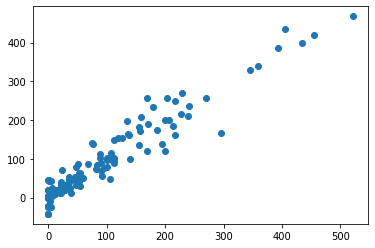

In [76]:
plt.scatter(y_test,y_pred)

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

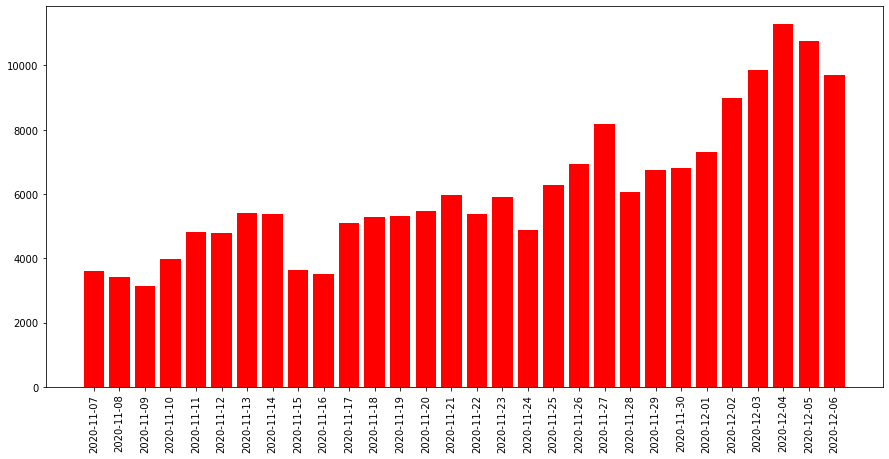

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

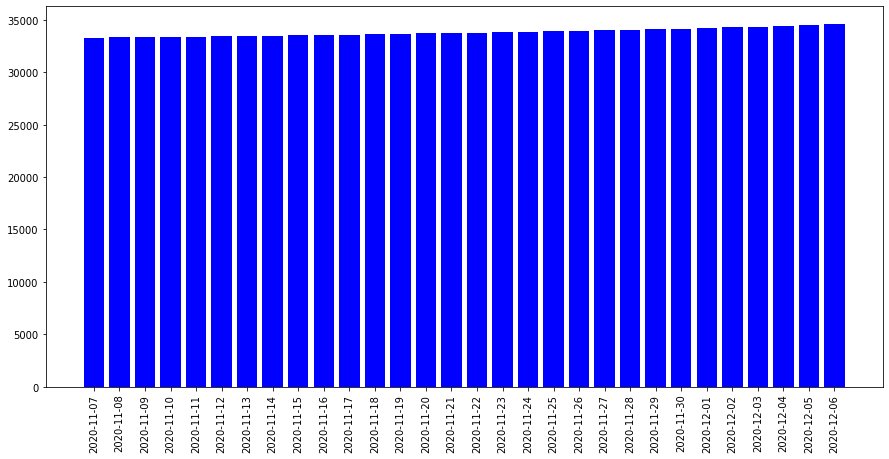

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

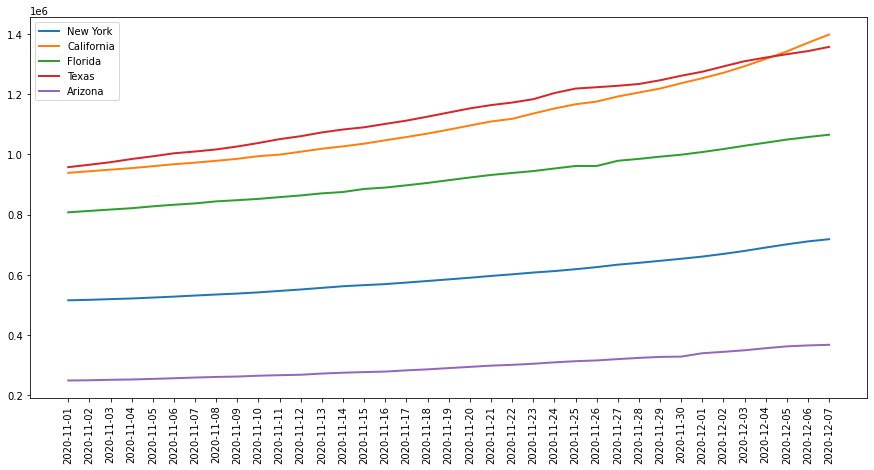

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --Your text here
2.   Conclusion 2
     --Your text here>

